# Import libraries and set up the environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


## read the csv file

In [2]:
df = pd.read_csv(r"./data/California_Houses.csv")
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,77100,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,92300,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,84700,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


# separating the data 

In [3]:
y = df['Median_House_Value']
x = df.drop(['Median_House_Value'], axis=1)
x

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


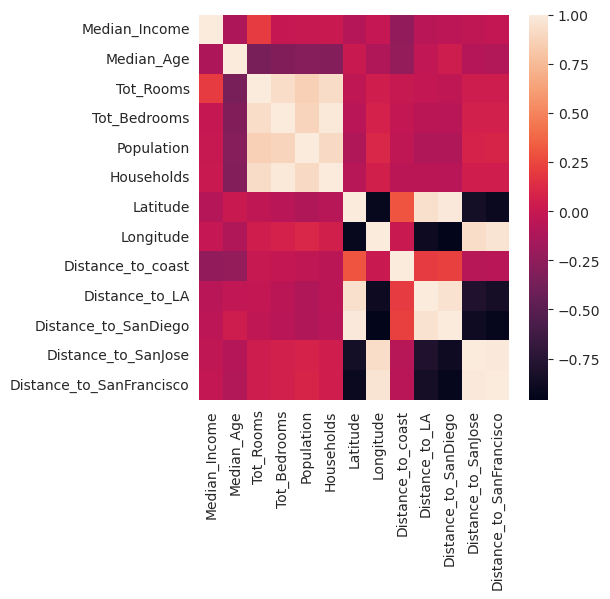

In [4]:

matrix = x.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(matrix, annot=False, fmt=".2f")
plt.show()

## Data splitting

In [5]:
#split the data 70:30
x_train, x_validationAndTest, y_train, y_validationAndTest = train_test_split(x, y, train_size=0.7)

#split the 30 50:50
x_validation, x_test, y_validation, y_test = train_test_split(x_validationAndTest, y_validationAndTest, train_size=0.5)

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


### Data scaling

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)
x_test = scaler.transform(x_test)

-------------------
## Model interpretation
* model score: the higher, the better
* MSE: the closer to zero the more accurate the prediction is
* MAE: same as MSE, closer to zero means more accurate model

----------------
## helpful resources
- [here](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
- [here](https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604)
- [linear regression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

----------------

## linear regression

In [16]:
LR = LinearRegression()
LR.fit(x_train, y_train)

linear_prediction = LR.predict(x_validation)
print("score: {}".format(LR.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, linear_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, linear_prediction)))

score: 0.6648708217924095
MSE: 4420911965.63725
MAE: 48912.22139365908


## lasso regression

In [17]:
lasso = Lasso(max_iter=200)
lasso.fit(x_train, y_train)

lasso_prediction = lasso.predict(x_validation)
print("score: {}".format(lasso.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, lasso_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, lasso_prediction)))

score: 0.6655662120043289
MSE: 4411738610.678714
MAE: 48888.81953533619


/home/hp/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+13, tolerance: 1.934e+10
  model = cd_fast.enet_coordinate_descent(


## Ridge regression

In [15]:
ridge = Ridge()
ridge.fit(x_train, y_train)

ridge_prediction = ridge.predict(x_validation)
print("score: {}".format(ridge.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, ridge_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, ridge_prediction)))

score: 0.6649313727007542
MSE: 4420113198.318144
MAE: 48907.90249422542


Text(0, 0.5, 'predicted Y')

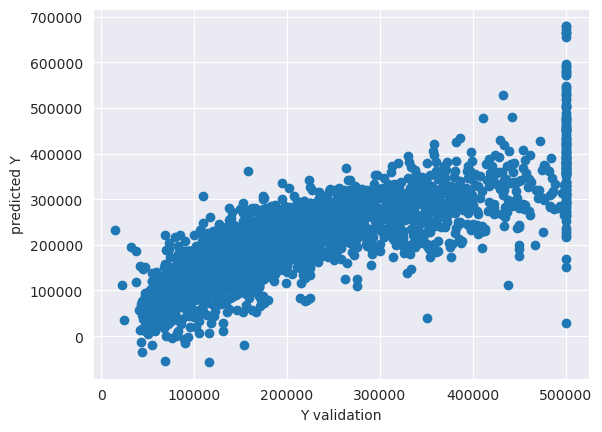

In [10]:
plt.scatter(y_validation, ridge_prediction)
plt.xlabel('Y validation')
plt.ylabel('predicted Y')

## Report